# **Project Name - IMDB Data Analysis Using pandasql**    



##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**

**Business Objective**

This project aims to derive insights and generate visualizations from the IMDb dataset using pandasql. The dataset, which includes a wide range of movie-related columns, is analyzed to understand trends and patterns in movie popularity, budget, revenue, and runtime.

**Methodology:**  
**1. Exploratory Data Analysis (EDA):**
  
  * Data Cleaning and Preparation: The first step involves
   cleaning the dataset to handle missing or inconsistent values. This includes filling missing values or removing rows with incomplete information. We also convert columns to appropriate data types, such as dates to datetime objects and numerical values to floats or integers.

 * Initial Data Exploration: Basic statistical summaries and
   visualizations are created to understand the data distribution and identify any obvious trends or anomalies. This initial exploration helps in forming hypotheses and guiding further analysis.

 * SQL Queries with pandasql: Using pandasql, SQL-like queries
   were applied to the pandas DataFrame to explore and analyze the data. This approach allows for flexible querying and insights generation. The analysis focused on various aspects, such as movie popularity, budget, revenue, and runtime, with visualizations to illustrate the findings.


2.   **Examples of Plots and Insights:**

  * **Top 10 Movies by Popularity (Horizontal Bar Plot):**

      This plot displays the top 10 movies with the highest popularity scores. By visualizing the most popular films, we can identify trends in viewer preferences and highlight which movies captured the most attention.

 * **Number of Movies Released Each Year (Bar Plot):**

      This bar plot shows the annual number of movie releases. It helps us understand the trends in movie production over time, revealing whether there has been an increase or decrease in the number of films released each year.

  * **Top 10 Movies with Highest Profit (Horizontal Bar Plot):**

      This visualization ranks the top 10 movies based on profit, calculated as revenue minus budget. It identifies the most financially successful movies, providing insight into which films yielded the highest returns on investment.

  * **Distribution of Budget (Histogram Plot):**

      The histogram displays the distribution of movie budgets. This visualization helps us understand the range and frequency of budgets across movies, revealing whether most films are produced with high or low budgets.

  * **Correlation Heatmap Plot:**

      The heatmap plot shows correlations between various numerical features, such as budget, revenue, and popularity. It helps identify relationships and dependencies between different attributes, such as whether higher budgets correlate with higher revenue or popularity.



# **GitHub Link -**

https://github.com/TechExplorer-AK/IMDB-Data-Analysis-Using-pandasql.git

#### **Define Your Business Objective?**

***To derive insights and generate visualizations with pandasql.***

In [1]:
# Installing pandasql
! pip install pandas pandasql

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker

from datetime import datetime
from datetime import time

### Dataset Loading

In [3]:
# Importing the dataset
dataset=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/imdb_data_record.csv')


### Dataset First View

In [4]:
dataset.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [5]:
dataset.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns
dataset.shape

(3000, 23)

### Dataset Information

In [7]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
print(dataset.isnull().sum())

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64


## ***Data Wrangling***

In [9]:
df=dataset.copy()

In [10]:
def str1(s):
  return eval(s)

In [11]:
df.loc[~df['cast'].isnull(),'cast']= df.loc[~df['cast'].isnull(),'cast'].apply(str1)


In [12]:
df.loc[~df['crew'].isnull(),'crew']= df.loc[~df['crew'].isnull(),'crew'].apply(str1)


In [13]:
df['release_date'] = df['release_date'].apply(lambda x: datetime.strptime(x,'%m/%d/%y'))


In [14]:
current_date = datetime.now()
df=df[df['release_date']<= current_date]

In [15]:
df.shape

(2856, 23)

### Filling Null Values

In [16]:
# Fill null values with 'Unknown' for categorical columns and fill with 0 for numerical columns
for i in list(df.columns):
  if df[i].dtype== 'object':
    df[i].fillna('Unknown',inplace= True)
  elif df[i].dtype in ('int64','float64'):
    df[i].fillna(0,inplace=True)

<ipython-input-16-7589fc44d2a6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i].fillna(0,inplace=True)
<ipython-input-16-7589fc44d2a6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i].fillna('Unknown',inplace= True)


In [17]:
# Check Missing/Null Values after filling those values
df.isnull().sum()

id                       0
belongs_to_collection    0
budget                   0
genres                   0
homepage                 0
imdb_id                  0
original_language        0
original_title           0
overview                 0
popularity               0
poster_path              0
production_companies     0
production_countries     0
release_date             0
runtime                  0
spoken_languages         0
status                   0
tagline                  0
title                    0
Keywords                 0
cast                     0
crew                     0
revenue                  0
dtype: int64

<Axes: >

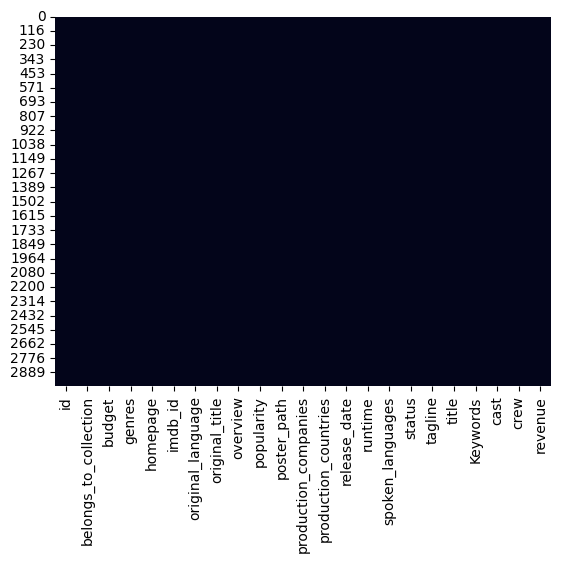

In [18]:
# Visualizing the missing values
sns.heatmap(df.isnull(),cbar=False)

In [19]:
new_df= df[df['budget']>1000]

In [20]:
new_df.describe()

,id,budget,popularity,release_date,runtime,revenue
count,2061.000000,2.061000e+03,2061.000000,2061,2061.000000,2.061000e+03
mean,1509.513343,3.259477e+07,9.899160,2003-04-08 05:23:29.606986752,109.469190,9.128855e+07
min,1.000000,2.500000e+03,0.003013,1969-01-01 00:00:00,0.000000,3.000000e+00
25%,761.000000,6.600000e+06,5.587707,1997-02-20 00:00:00,95.000000,7.830611e+06
50%,1515.000000,1.800000e+07,8.378149,2005-09-04 00:00:00,105.000000,3.200000e+07
75%,2259.000000,4.000000e+07,11.746053,2011-08-17 00:00:00,120.000000,1.039117e+08
max,3000.000000,3.800000e+08,294.337037,2024-03-18 00:00:00,338.000000,1.519558e+09
std,866.105543,4.086698e+07,14.102995,NaN,21.767363,1.590447e+08


In [21]:
new_df.shape

(2061, 23)

In [22]:
# Extracting director name from crew column having values in the form of list of dictionaries
def extract_director_name(row):
    try:
        directors_name= [item['name'] for item in row if item['job']== 'Director']
        return ', '.join(directors_name)
    except TypeError:
        return None  # Handle non-list or other unexpected types gracefully


In [23]:
new_df['director'] = new_df['crew'].apply(extract_director_name)


<ipython-input-23-25b0323478e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['director'] = new_df['crew'].apply(extract_director_name)


In [24]:
# Creating profit column
new_df['profit'] = new_df['revenue'] - new_df['budget']


<ipython-input-24-0668c3b7cb08>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['profit'] = new_df['revenue'] - new_df['budget']


In [25]:
# Creating release_year column from release_date
new_df['release_year']= new_df['release_date'].dt.year
new_df= new_df[new_df['release_year']< datetime.now().year]

<ipython-input-25-ade2c4f70de6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['release_year']= new_df['release_date'].dt.year


In [26]:
new_df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,status,tagline,title,Keywords,cast,crew,revenue,director,profit,release_year
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",Unknown,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,Steve Pink,-1685349,2015
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",Unknown,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,Garry Marshall,55149435,2004
2,3,Unknown,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,Damien Chazelle,9792000,2014
3,4,Unknown,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,Released,Unknown,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,Sujoy Ghosh,14800000,2012
5,6,Unknown,8000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",Unknown,tt0093743,en,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,...,Released,Unknown,Pinocchio and the Emperor of the Night,Unknown,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638,Hal Sutherland,-4738362,1987


In [27]:
for j in list(new_df.columns):
  if new_df[j].dtype== 'object':
    new_df[j].fillna('Unknown',inplace= True)

In [28]:
new_df.isnull().sum()

id                       0
belongs_to_collection    0
budget                   0
genres                   0
homepage                 0
imdb_id                  0
original_language        0
original_title           0
overview                 0
popularity               0
poster_path              0
production_companies     0
production_countries     0
release_date             0
runtime                  0
spoken_languages         0
status                   0
tagline                  0
title                    0
Keywords                 0
cast                     0
crew                     0
revenue                  0
director                 0
profit                   0
release_year             0
dtype: int64

### Creating a new dataframe 'get_df' to load into database file

In [29]:
# Creating a new dataframe 'get_df' by selecting only those columns on which query will be performed
get_df= new_df.loc[:,['id','imdb_id','original_language', 'original_title','budget','overview',
                      'popularity','release_date','release_year','runtime','status','revenue',
                      'director', 'profit']]

In [30]:
get_df.shape

(2060, 14)

In [31]:
get_df.dtypes

id                            int64
imdb_id                      object
original_language            object
original_title               object
budget                        int64
overview                     object
popularity                  float64
release_date         datetime64[ns]
release_year                  int32
runtime                     float64
status                       object
revenue                       int64
director                     object
profit                        int64
dtype: object

In [32]:
# Loading dataset 'get_df' into database file 'imdb.db'
conn= sqlite3.connect('imdb.db')
get_df.to_sql('imdb_records',conn, if_exists ='replace', index = False)
conn.close()

In [33]:
conn= sqlite3.connect('imdb.db')
conn.commit()

## Analyzing the 'imdb_records' Table: Insights and Visualizations

### 1.Finding Top 10 Movies by Popularity:



In [34]:
p=pd.read_sql_query(''' select original_title,round(popularity,2) popularity  from imdb_records order by popularity desc limit 10''',conn)
print(p)

                   original_title  popularity
0                    Wonder Woman      294.34
1            Beauty and the Beast      287.25
2                     Baby Driver      228.03
3                        Deadpool      187.86
4  Guardians of the Galaxy Vol. 2      185.33
5                       Gone Girl      154.80
6  War for the Planet of the Apes      146.16
7                 The Dark Knight      123.17
8                    The Avengers       89.89
9                      The Circle       88.44


<ipython-input-35-d598dd33f6e4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=p, x='popularity', y='original_title', palette='viridis',width=0.7)
<ipython-input-35-d598dd33f6e4>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=0)


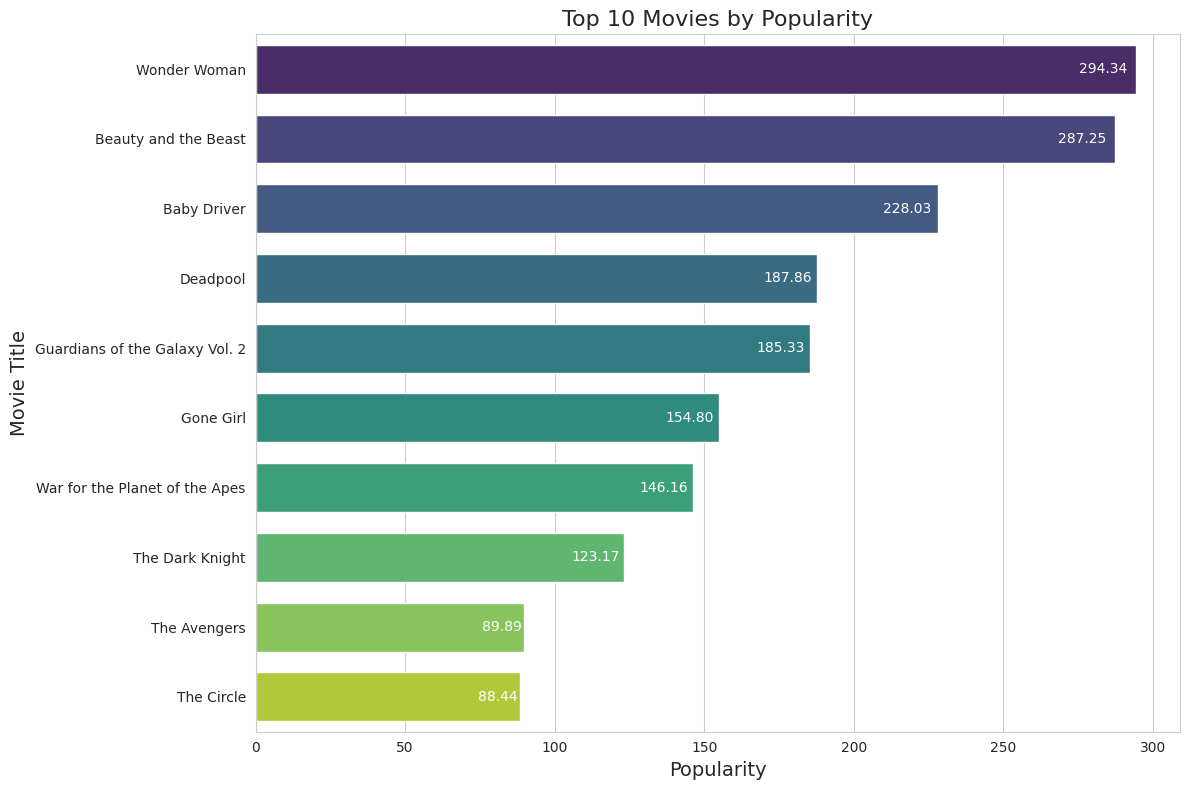

In [35]:
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(data=p, x='popularity', y='original_title', palette='viridis',width=0.7)

# Add title and labels
bar_plot.set_title('Top 10 Movies by Popularity', fontsize=16)
bar_plot.set_xlabel('Popularity', fontsize=14)
bar_plot.set_ylabel('Movie Title', fontsize=14)

for p in bar_plot.patches:
    # Get the height of the bar (profit)
    height = p.get_width()

    # Calculate position for the annotation
    x_pos = height * 0.99
    y_pos = p.get_y() + p.get_height() / 2
    # Add text annotation inside the bar
    bar_plot.text(x_pos, y_pos,
                  f'{height:.2f}',
                  ha='right', va='center', fontsize=10, color='white')


# Rotate x-tick labels if necessary
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

### 2. Number of Movies Released Each Year


In [36]:
k=pd.read_sql_query(''' SELECT release_year,COUNT(*) AS movie_count FROM imdb_records GROUP BY release_year ORDER BY release_year''',conn)
print(k)

    release_year  movie_count
0           1969            5
1           1970            7
2           1971            7
3           1972            7
4           1973            6
5           1974            3
6           1975            4
7           1976            7
8           1977            9
9           1978            6
10          1979           10
11          1980           12
12          1981           20
13          1982           13
14          1983           13
15          1984           23
16          1985           21
17          1986           24
18          1987           23
19          1988           30
20          1989           28
21          1990           29
22          1991           24
23          1992           26
24          1993           32
25          1994           34
26          1995           42
27          1996           43
28          1997           50
29          1998           51
30          1999           54
31          2000           55
32        

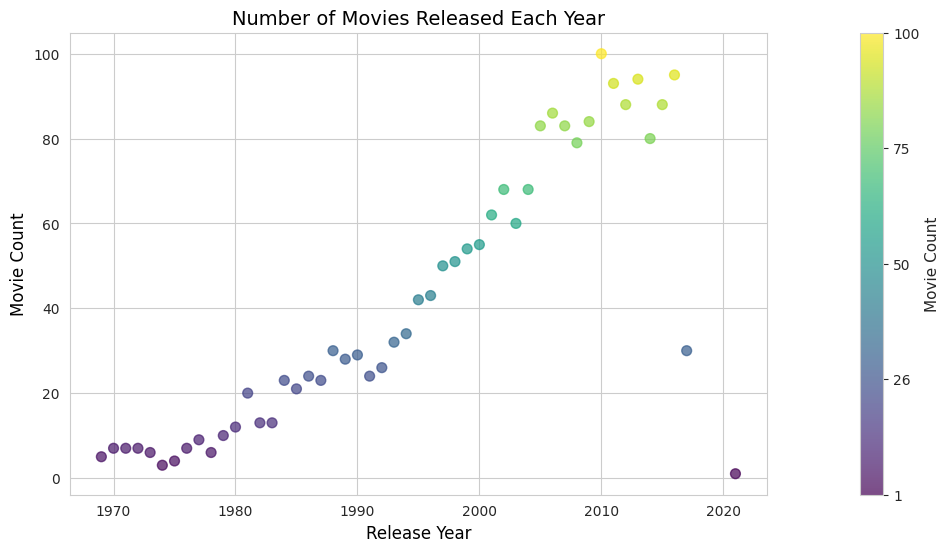

In [37]:
fig, ax = plt.subplots(figsize=(12, 6))

scatter=plt.scatter(k['release_year'], k['movie_count'],c=k['movie_count'], cmap='viridis', s=50, alpha=0.7)

# Set title, x-axis label, and y-axis label using ax methods
ax.set_title('Number of Movies Released Each Year',fontsize= 14, color='black')
ax.set_xlabel('Release Year',fontsize= 12, color='black')
ax.set_ylabel('Movie Count',fontsize= 12, color='black')

# Add color bar as a legend
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Movie Count',fontsize= 11)

# Adjust ticks on the color bar
min_val = k['movie_count'].min()
max_val = k['movie_count'].max()
mid_val=50
# Generate ticks array
ticks = np.linspace(min_val, max_val, num=5)

# Set ticks and format tick labels
cbar.set_ticks(ticks)
cbar.set_ticklabels([f'{tick:.0f}' for tick in ticks])

plt.grid(True)
plt.show()

### 3. Top 10 Movies With Highest Profit

In [38]:
l=pd.read_sql_query('''SELECT original_title, profit FROM imdb_records ORDER BY profit DESC LIMIT 10''',conn)
print(l)

                          original_title      profit
0                              Furious 7  1316249360
1                           The Avengers  1299557910
2                Avengers: Age of Ultron  1125403694
3                   Beauty and the Beast  1102886337
4         Transformers: Dark of the Moon   928746996
5                               Zootopia   873784195
6                          Jurassic Park   857100000
7  The Lord of the Rings: The Two Towers   847287400
8                  The Dark Knight Rises   834939099
9                           Finding Dory   828570889


<ipython-input-39-8964d4f824fc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=l, x='profit', y='original_title', palette='viridis', width=0.7)


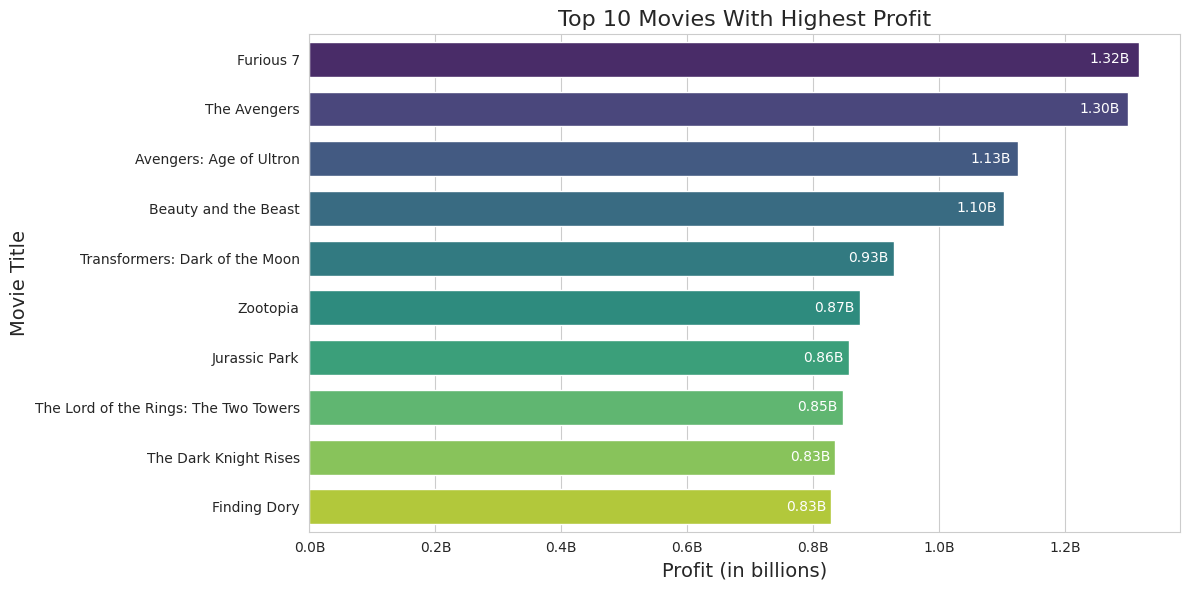

In [39]:
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=l, x='profit', y='original_title', palette='viridis', width=0.7)

# Add title and labels
bar_plot.set_title('Top 10 Movies With Highest Profit', fontsize=16)
bar_plot.set_xlabel('Profit (in billions)', fontsize=14)
bar_plot.set_ylabel('Movie Title', fontsize=14)

# Format x-axis to show values in billions
def format_billions(x, pos):
    'The two args are the value and tick position'
    return f'{x*1e-9:.1f}B'

bar_plot.xaxis.set_major_formatter(FuncFormatter(format_billions))

# Add value annotations inside the top of the bars
for p in bar_plot.patches:
    # Get the height of the bar (profit)
    height = p.get_width()
    # Convert height to billions
    height_in_billions = height * 1e-9
    # Calculate position for the annotation
    x_pos = height * 0.99
    y_pos = p.get_y() + p.get_height() / 2
    # Add text annotation inside the bar
    bar_plot.text(x_pos, y_pos,
                  f'{height_in_billions:.2f}B',
                  ha='right', va='center', fontsize=10, color='white')

# Adjust layout
plt.tight_layout()
plt.show()

### 4. Average Popularity by Original Language

In [40]:
d=pd.read_sql_query(''' SELECT original_language, round(AVG(popularity),2) AS avg_popularity FROM imdb_records GROUP BY original_language ORDER BY avg_popularity DESC''',conn)
print(d)

   original_language  avg_popularity
0                 en           10.52
1                 id            8.43
2                 cn            7.99
3                 no            7.97
4                 he            7.64
5                 ja            7.61
6                 fa            7.52
7                 ko            7.49
8                 de            7.43
9                 fr            7.09
10                es            7.02
11                it            6.89
12                da            6.48
13                pl            6.44
14                hu            6.31
15                nb            6.10
16                zh            5.38
17                pt            5.05
18                ro            4.29
19                sv            3.99
20                hi            3.39
21                ru            2.29
22                nl            1.89
23                tr            1.64
24                ta            1.26
25                sr            1.02
2

<ipython-input-41-62103e4e2156>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=d, x='avg_popularity', y='original_language', palette='viridis')
<ipython-input-41-62103e4e2156>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=0, ha='right')


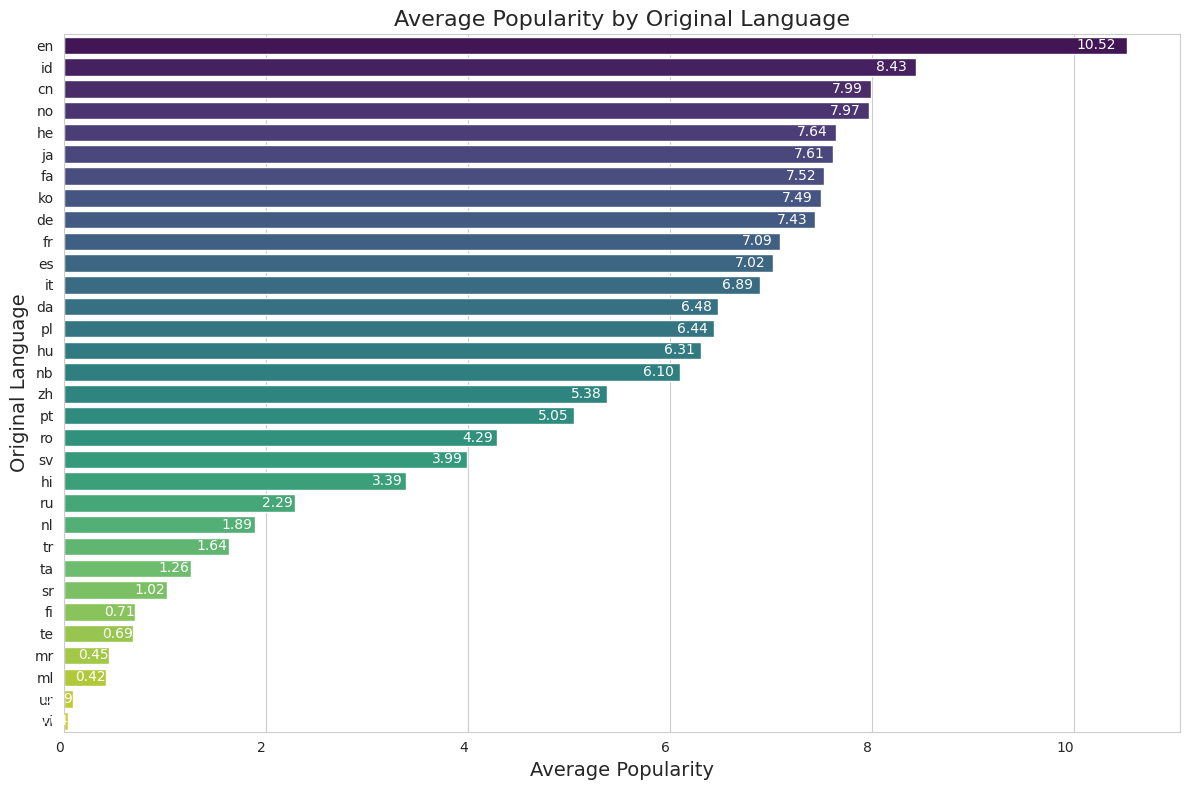

In [41]:
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(data=d, x='avg_popularity', y='original_language', palette='viridis')
bar_plot.set_title('Average Popularity by Original Language', fontsize=16)
bar_plot.set_xlabel('Average Popularity', fontsize=14)
bar_plot.set_ylabel('Original Language', fontsize=14)

# Add value annotations inside the top of the bars
for p in bar_plot.patches:
    # Get the height of the bar (average popularity)
    height = p.get_width()
    # Position for the annotation
    x_pos = height * 0.99
    y_pos = p.get_y() + p.get_height() / 2
    # Add text annotation inside the bar
    bar_plot.text(x_pos, y_pos,
                  f'{height:.2f}',
                  ha='right', va='center', fontsize=10, color='white')

# Adjust x-axis labels
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=0, ha='right')

plt.tight_layout()
plt.show()


### 5. Top 10 Languages by Movie Count

In [42]:
n=pd.read_sql_query('''select original_language,count(original_title) movie_count from imdb_records group by original_language order by count(original_title) desc limit 10 ''',conn)
print(n)

  original_language  movie_count
0                en         1823
1                hi           37
2                fr           37
3                ru           28
4                ja           18
5                es           17
6                zh           14
7                ta           12
8                it           12
9                de           11


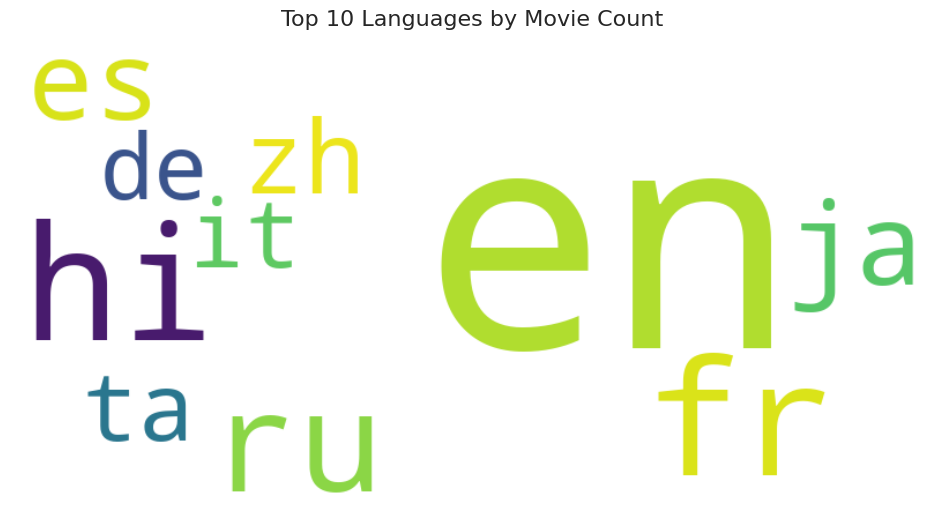

In [43]:

word_freq = dict(zip(n['original_language'], n['movie_count']))

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 10 Languages by Movie Count', fontsize=16)
plt.show()

### 6. Top 10 Most Expensive Movies (by Budget)

In [44]:
k=pd.read_sql_query('''SELECT original_title, budget FROM imdb_records ORDER BY budget DESC LIMIT 10''',conn)
print(k)

                                original_title     budget
0  Pirates of the Caribbean: On Stranger Tides  380000000
1     Pirates of the Caribbean: At World's End  300000000
2                      Avengers: Age of Ultron  280000000
3                             Superman Returns  270000000
4                                  John Carter  260000000
5                Transformers: The Last Knight  260000000
6          The Hobbit: The Desolation of Smaug  250000000
7                        The Dark Knight Rises  250000000
8       Harry Potter and the Half-Blood Prince  250000000
9            The Hobbit: An Unexpected Journey  250000000


<ipython-input-45-54f8cebe75b9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=k, x='budget', y='original_title', palette='viridis')


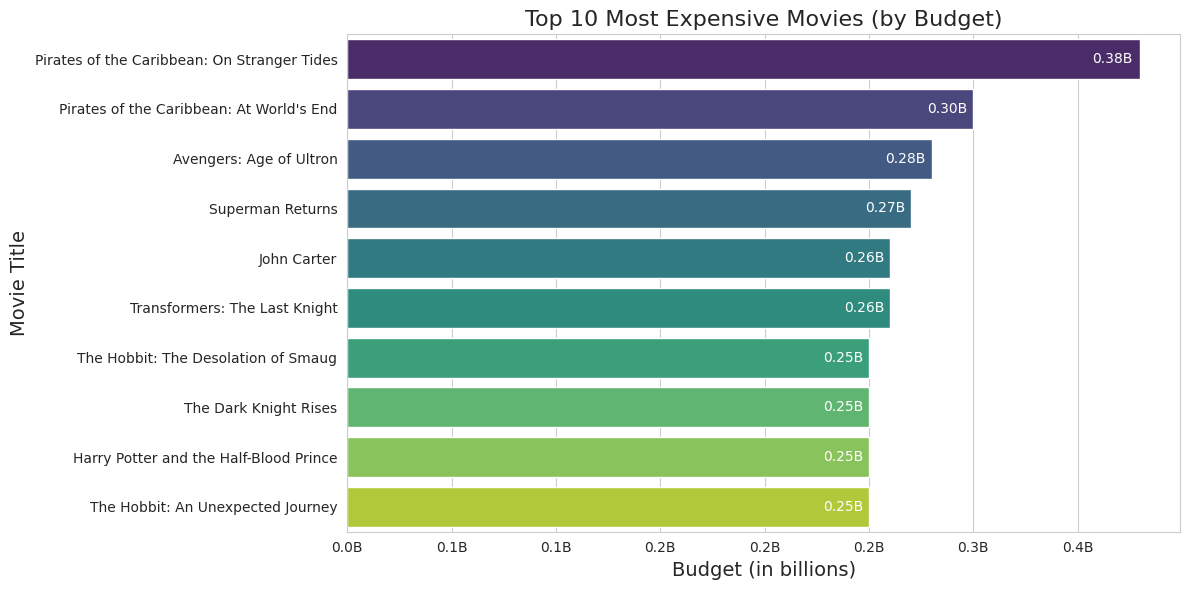

In [45]:
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=k, x='budget', y='original_title', palette='viridis')
bar_plot.set_title('Top 10 Most Expensive Movies (by Budget)', fontsize=16)
bar_plot.set_xlabel('Budget (in billions)', fontsize=14)
bar_plot.set_ylabel('Movie Title', fontsize=14)

# Format x-axis to show values in billions
def format_billions(x, pos):
    'The two args are the value and tick position'
    return f'{x*1e-9:.1f}B'

bar_plot.xaxis.set_major_formatter(FuncFormatter(format_billions))

# Add value annotations inside the top of the bars
for p in bar_plot.patches:
    # Get the height of the bar (budget)
    height = p.get_width()
    # Convert height to billions
    height_in_billions = height * 1e-9
    # Calculate position for the annotation
    x_pos = height * 0.99
    y_pos = p.get_y() + p.get_height() / 2
    # Add text annotation inside the bar
    bar_plot.text(x_pos, y_pos,
                  f'{height_in_billions:.2f}B',
                  ha='right', va='center', fontsize=10, color='white')

plt.tight_layout()
plt.show()

### 7. Most Profitable Movies of the Past 15 Years

In [46]:
q=pd.read_sql_query('''WITH RankedMovies AS (
    SELECT release_year,
           original_title,
           profit,
           dense_rank() OVER (PARTITION BY release_year ORDER BY profit DESC) AS rank
    FROM imdb_records
)
SELECT release_year,
       original_title,
       profit
FROM RankedMovies
WHERE rank =1 order by release_year desc  limit 15''', conn)
print(q)

    release_year                                original_title      profit
0           2021                                       The Kid     2250000
1           2017                          Beauty and the Beast  1102886337
2           2016                                      Zootopia   873784195
3           2015                                     Furious 7  1316249360
4           2014                       Guardians of the Galaxy   603328629
5           2013           The Hobbit: The Desolation of Smaug   708400000
6           2012                                  The Avengers  1299557910
7           2011                Transformers: Dark of the Moon   928746996
8           2010                           Alice in Wonderland   825491110
9           2009                Ice Age: Dawn of the Dinosaurs   796686817
10          2008                               The Dark Knight   819558444
11          2007      Pirates of the Caribbean: At World's End   661000000
12          2006         

<ipython-input-47-79ea7aaae814>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=q, x='release_year', y='profit', palette='viridis')
<ipython-input-47-79ea7aaae814>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, ha='right')


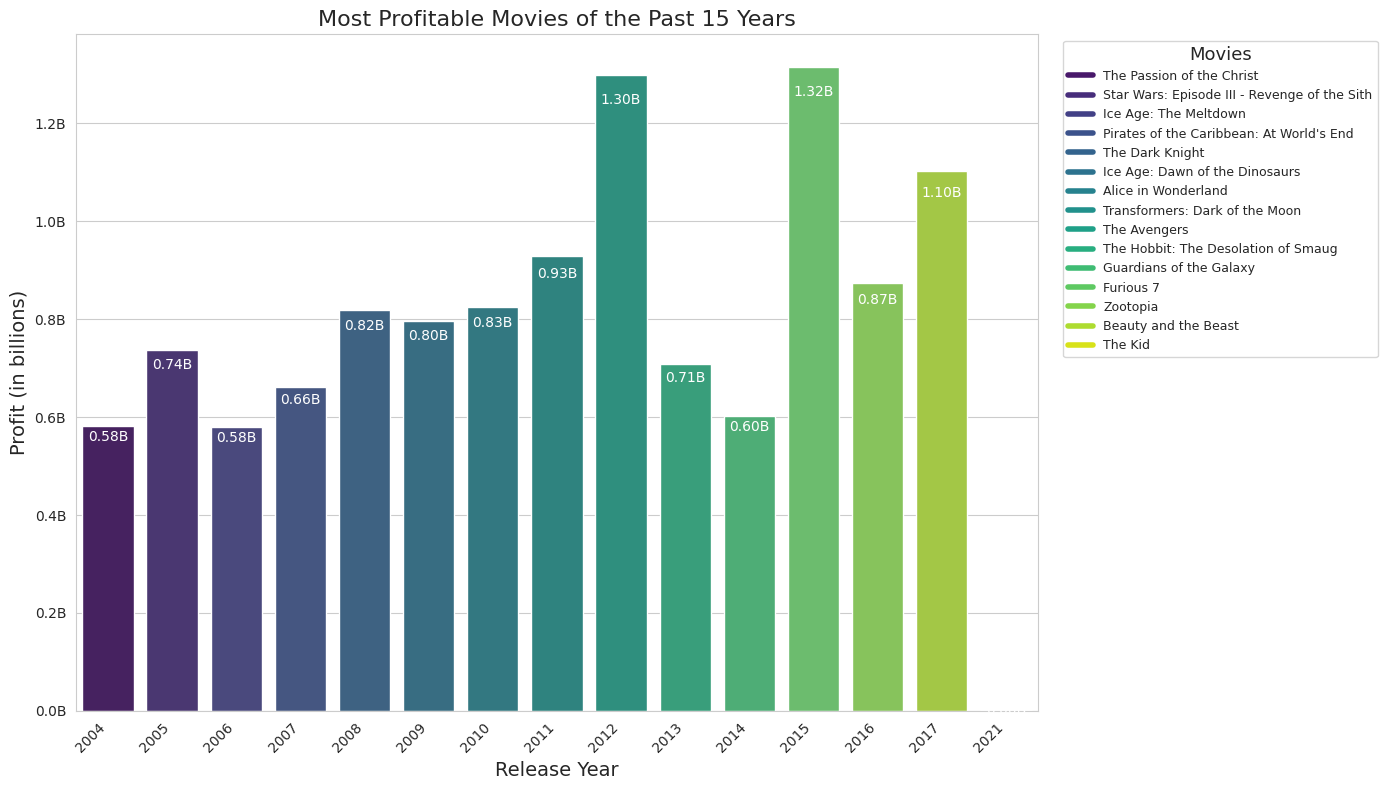

In [47]:
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(data=q, x='release_year', y='profit', palette='viridis')

# Set title and labels
bar_plot.set_title('Most Profitable Movies of the Past 15 Years', fontsize=16)
bar_plot.set_xlabel('Release Year', fontsize=14)
bar_plot.set_ylabel('Profit (in billions)', fontsize=14)

# Add value annotations slightly downward inside the top of the bars
for p in bar_plot.patches:
    # Get the height of the bar (profit)
    height = p.get_height()
    # Position for the annotation
    x_pos = p.get_x() + p.get_width() / 2
    y_pos = height * 0.96
    # Add text annotation
    bar_plot.text(x_pos, y_pos, f'{height * 1e-9:.2f}B',  # Adjusted to billions
                  ha='center', va='center', fontsize=10, color='white')

# Adjust y-axis ticks to display in billions
bar_plot.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x * 1e-9:.1f}B'))

# Adjust x-axis labels for readability
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, ha='right')

# Create custom handles and labels for the legend
palette = sns.color_palette('viridis', len(q))
handles = [plt.Line2D([0], [0], color=palette[i], lw=4) for i in range(len(q))]
labels = q['original_title'].tolist()  # Extract movie titles in the order of appearance

# Reverse only the labels for the legend
reversed_labels = labels[::-1]

# Add a legend with reversed labels
plt.legend(handles, reversed_labels, title='Movies', title_fontsize='13', fontsize='9', bbox_to_anchor=(1.02, 1), loc='upper left')

# Adjust layout to fit elements properly
plt.tight_layout()

# Show the plot
plt.show()

### 8. Longest Runtime Movies in the Last 10 Years

In [48]:
s=pd.read_sql_query('''WITH RankedMovies AS (
    SELECT release_year,
           original_title,
           runtime,
           dense_rank() OVER (PARTITION BY release_year ORDER BY runtime DESC) AS rank
    FROM imdb_records
)
SELECT release_year,
       original_title,
       runtime
FROM RankedMovies
WHERE rank =1 order by release_year desc  limit 10''', conn)
print(s)

   release_year                 original_title  runtime
0          2021                        The Kid     68.0
1          2017  Transformers: The Last Knight    149.0
2          2016                   Toni Erdmann    162.0
3          2015          The Birth of a Nation    193.0
4          2014                        Boyhood    164.0
5          2013             Bhaag Milkha Bhaag    186.0
6          2012                    Cloud Atlas    172.0
7          2011                     Шапито-шоу    207.0
8          2010                         Carlos    338.0
9          2009                           Ayan    162.0


<ipython-input-49-557e92c796d4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=s, x='release_year', y='runtime', palette='viridis')
<ipython-input-49-557e92c796d4>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, ha='right')


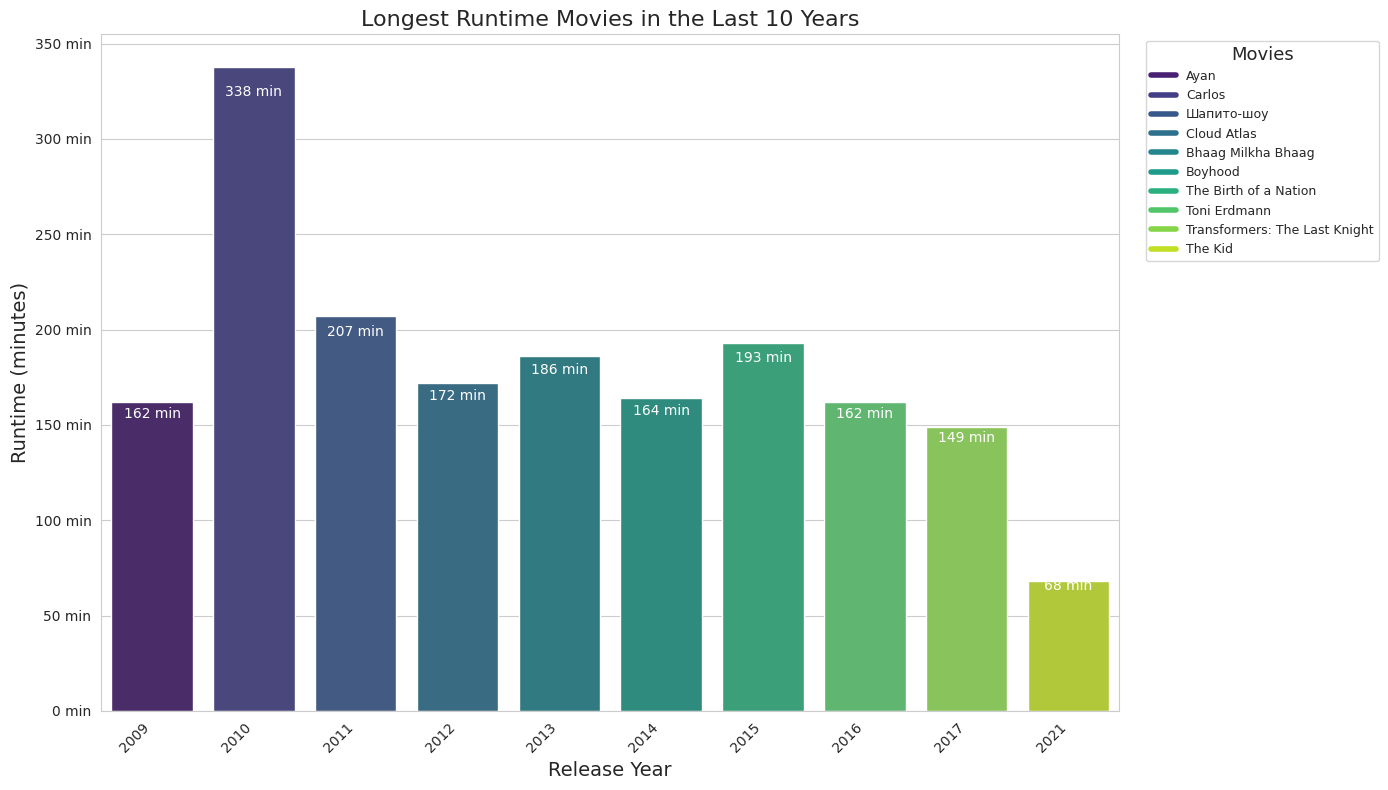

In [49]:
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(data=s, x='release_year', y='runtime', palette='viridis')

# Set title and labels
bar_plot.set_title('Longest Runtime Movies in the Last 10 Years', fontsize=16)
bar_plot.set_xlabel('Release Year', fontsize=14)
bar_plot.set_ylabel('Runtime (minutes)', fontsize=14)

# Add value annotations slightly downward inside the top of the bars
for p in bar_plot.patches:
    # Get the height of the bar (runtime)
    height = p.get_height()
    # Position for the annotation
    x_pos = p.get_x() + p.get_width() / 2
    y_pos = height * 0.96
    # Add text annotation
    bar_plot.text(x_pos, y_pos, f'{height:.0f} min',  # Runtime in minutes
                  ha='center', va='center', fontsize=10, color='white')

# Adjust y-axis labels for readability
bar_plot.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.0f} min'))

# Adjust x-axis labels for readability
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, ha='right')

# Create custom handles and labels for the legend
palette = sns.color_palette('viridis', len(s))
handles = [plt.Line2D([0], [0], color=palette[i], lw=4) for i in range(len(s))]
labels = s['original_title'].tolist()  # Extract movie titles in the order of appearance

# Reverse only the labels for the legend
reversed_labels = labels[::-1]

# Add a legend with reversed labels
plt.legend(handles, reversed_labels, title='Movies', title_fontsize='13', fontsize='9', bbox_to_anchor=(1.02, 1), loc='upper left')

# Adjust layout to fit elements properly
plt.tight_layout()

# Show the plot
plt.show()

### 9. Top 10 Movies by ROI

In [50]:
roi_data= pd.read_sql_query('''SELECT original_title,(revenue - budget) /budget AS roi FROM imdb_records order by roi desc limit 10''',conn)
print(roi_data)

              original_title    roi
0        Paranormal Activity  12889
1    The Blair Witch Project   4132
2                         대호   2215
3             Pink Flamingos    499
4  The Legend of Boggy Creek    219
5                      Rocky    116
6                     Clerks    115
7      The Birth of a Nation    109
8        The Hills Have Eyes    107
9            Friday the 13th    107


<ipython-input-51-49115b9841fc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=roi_data, x='roi', y='original_title', palette='viridis')
<ipython-input-51-49115b9841fc>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=0, ha='right')
<ipython-input-51-49115b9841fc>:25: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  plt.tight_layout()
<ipython-input-51-49115b9841fc>:25: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPy

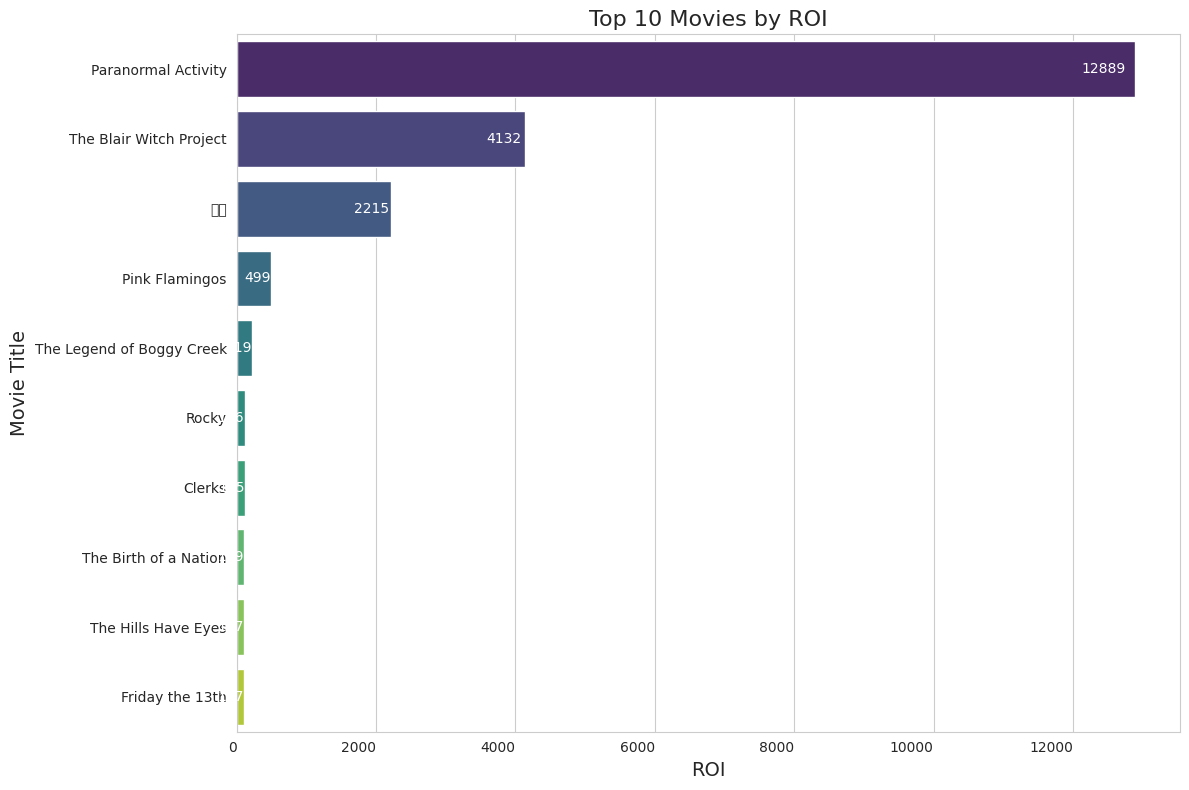

In [51]:
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(data=roi_data, x='roi', y='original_title', palette='viridis')
bar_plot.set_title('Top 10 Movies by ROI', fontsize=16)
bar_plot.set_xlabel('ROI', fontsize=14)
bar_plot.set_ylabel('Movie Title', fontsize=14)

# Add value annotations inside the top of the bars
for p in bar_plot.patches:
    # Get the height of the bar (average popularity)
    height = p.get_width()
    # Position for the annotation
    x_pos = height * 0.99
    y_pos = p.get_y() + p.get_height() / 2
    # Add text annotation inside the bar
    bar_plot.text(x_pos, y_pos,
                  f'{height:.0f}',
                  ha='right', va='center', fontsize=10, color='white')

# Adjust x-axis labels
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=0, ha='right')

plt.tight_layout()
plt.show()


### 10. Correlation Heatmap

In [52]:
u=pd.read_sql_query('''SELECT budget, revenue, runtime, popularity FROM imdb_records''',conn)
corr = u.corr()
print(corr)

              budget   revenue   runtime  popularity
budget      1.000000  0.736447  0.249470    0.306447
revenue     0.736447  1.000000  0.227973    0.441818
runtime     0.249470  0.227973  1.000000    0.125216
popularity  0.306447  0.441818  0.125216    1.000000


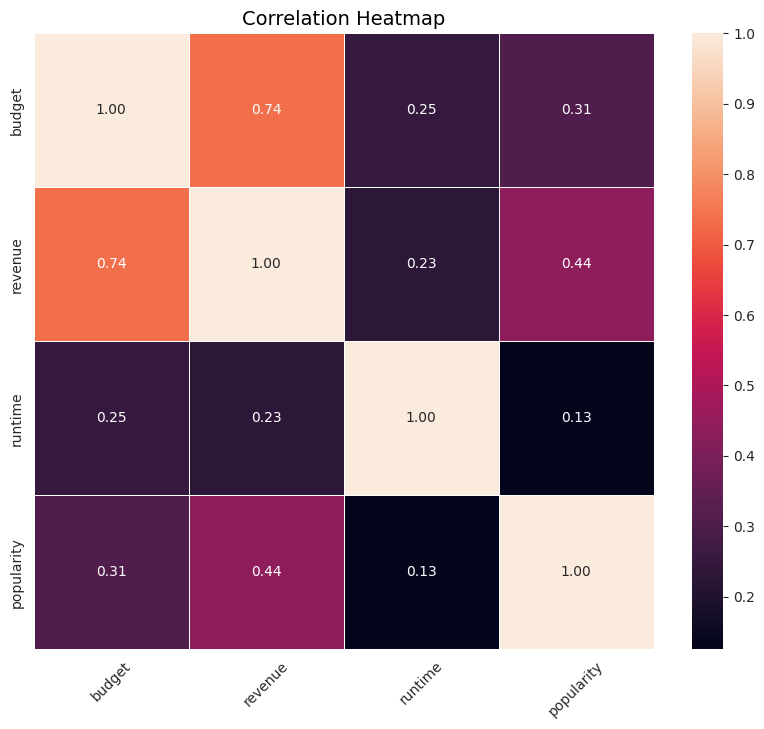

In [53]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cbar=True, fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap',fontsize=14,color='black')
plt.xticks(rotation=45)
plt.show()

### 11. Movies with Highest and Lowest Popularity

In [54]:
highest_popularity_data = pd.read_sql_query('''SELECT original_title, ROUND(popularity,2) popularity FROM imdb_records ORDER BY popularity DESC LIMIT 10''',conn)
print(highest_popularity_data)

                   original_title  popularity
0                    Wonder Woman      294.34
1            Beauty and the Beast      287.25
2                     Baby Driver      228.03
3                        Deadpool      187.86
4  Guardians of the Galaxy Vol. 2      185.33
5                       Gone Girl      154.80
6  War for the Planet of the Apes      146.16
7                 The Dark Knight      123.17
8                    The Avengers       89.89
9                      The Circle       88.44


In [55]:
lowest_popularity_data = pd.read_sql_query('''SELECT original_title, ROUND(popularity,2) popularity FROM imdb_records ORDER BY popularity ASC LIMIT 10 ''',conn)
print(lowest_popularity_data)

                                    original_title  popularity
0                                            Swoon        0.00
1                                          Cheetah        0.01
2                                        Vượt Sóng        0.04
3            The Amazing Truth About Queen Raquela        0.04
4                                          Sankofa        0.05
5                                     காதல் கோட்டை        0.07
6                                           Bwakaw        0.08
7  The Book of Mormon Movie, Volume 1: The Journey        0.08
8                                        تین بہادر        0.09
9                             Camille Claudel 1915        0.11


<ipython-input-56-69a53f9b5106>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=highest_popularity_data, x='popularity', y='original_title', palette='viridis')
<ipython-input-56-69a53f9b5106>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=lowest_popularity_data, x='popularity', y='original_title', palette='viridis')
<ipython-input-56-69a53f9b5106>:19: UserWarning: Glyph 2965 (\N{TAMIL LETTER KA}) missing from current font.
  plt.tight_layout()
<ipython-input-56-69a53f9b5106>:19: UserWarning: Matplotlib currently does not support Tamil natively.
  plt.tight_layout()
<ipython-input-56-69a53f9b5106>:19: UserWarning: Glyph 3006 (\N{TAMIL VOWEL SIGN AA}) missing from current font.

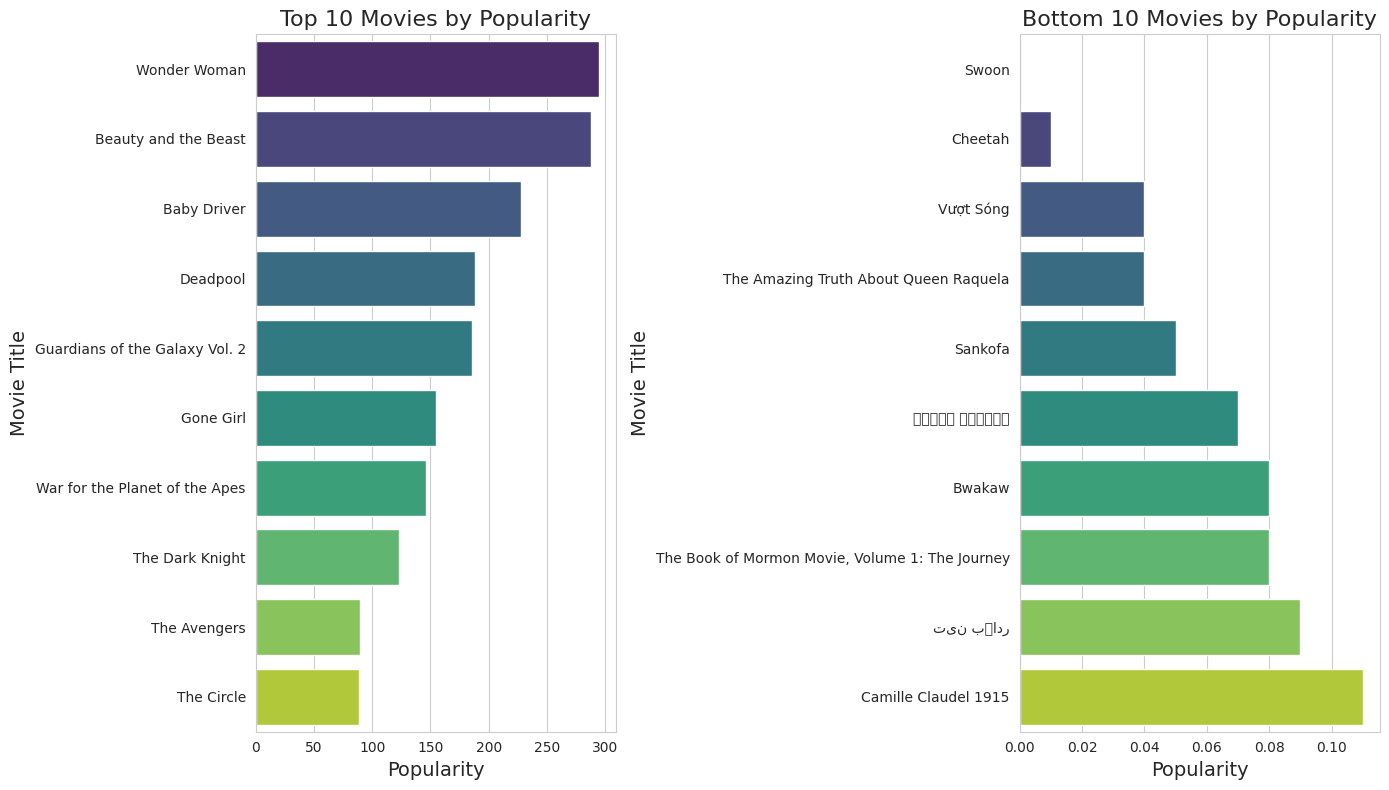

In [56]:
# Set up the figure and axes
plt.figure(figsize=(14, 8))

# Plot for highest popularity
plt.subplot(1, 2, 1)
sns.barplot(data=highest_popularity_data, x='popularity', y='original_title', palette='viridis')
plt.title('Top 10 Movies by Popularity', fontsize=16)
plt.xlabel('Popularity', fontsize=14)
plt.ylabel('Movie Title', fontsize=14)

# Plot for lowest popularity
plt.subplot(1, 2, 2)
sns.barplot(data=lowest_popularity_data, x='popularity', y='original_title', palette='viridis')
plt.title('Bottom 10 Movies by Popularity', fontsize=16)
plt.xlabel('Popularity', fontsize=14)
plt.ylabel('Movie Title', fontsize=14)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


### 12. Distribution of Budget

In [57]:
distribution_data= pd.read_sql_query('''SELECT budget FROM imdb_records''',conn)

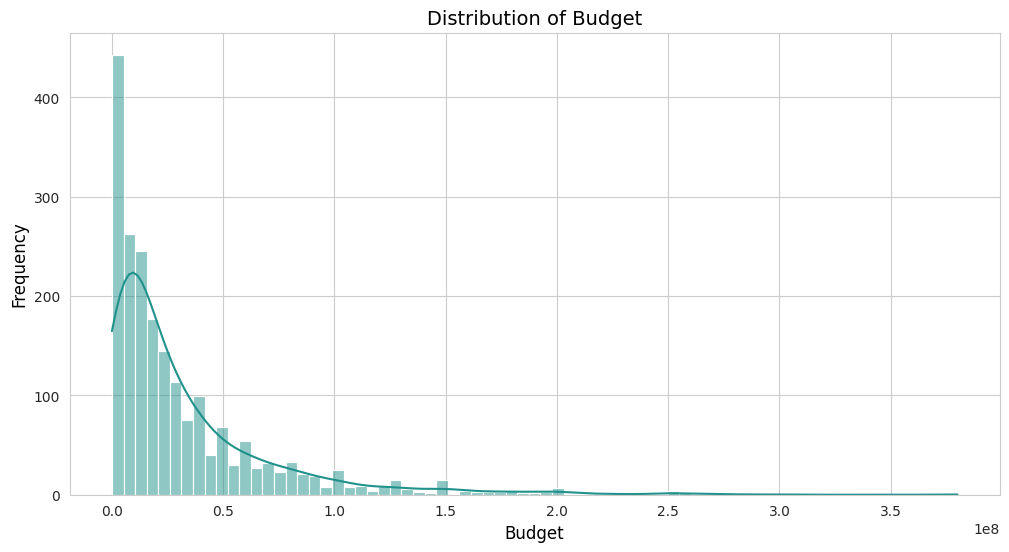

In [58]:
viridis_palette = sns.color_palette('viridis', as_cmap=True)
color = viridis_palette(0.5)

fig, ax = plt.subplots(figsize=(12, 6))

sns.histplot(distribution_data['budget'], kde=True,color=color)

# Set title, x-axis label, and y-axis label using ax methods
ax.set_title('Distribution of Budget',fontsize= 14, color='black')
ax.set_xlabel('Budget',fontsize= 12, color='black')
ax.set_ylabel('Frequency',fontsize= 12, color='black')

plt.show()

# **Conclusion**

The analysis of the IMDb dataset using pandasql has provided valuable insights into various aspects of the movie industry, spanning popularity, financial performance, runtime trends, language preferences, and more. Here’s a summary of the key findings from the 12 plots generated:

* **Top 10 Movies by Popularity:**
  The top movies by popularity scores indicate which films captured the most audience attention. This insight is crucial for understanding viewer preferences and identifying successful movie titles.

* **Number of Movies Released Each Year:**
  Over the years, there has been a noticeable fluctuation in the number of movie releases. While some years saw a surge in production, others experienced a decline, reflecting industry dynamics and economic factors.

* **Top 10 Movies with Highest Profit:**
  Movies with the highest profits, calculated as revenue minus budget, underscore the financial success of certain films. This analysis highlights which movies achieved substantial returns on their investments.

* **Top 10 Most Expensive Movies (by Budget):**
  The top budgeted movies reveal significant investments in production, showcasing the scale and ambition behind these cinematic endeavors.

* **Longest Runtime Movies in the Last 10 Years:**
  Trends in movie lengths over the past decade show shifts in storytelling preferences and audience engagement with longer narratives.

* **Distribution of Budget :**
  The histogram of movie budgets provides a clear picture of the financial landscape in filmmaking, illustrating the range and distribution of budgets across different films.

* **Correlation Heatmap Plot:**
  The heatmap reveals correlations between key numerical features such as budget, revenue, and popularity. It helps identify relationships and dependencies, such as the impact of higher budgets on revenue generation and audience appeal.

* **Average Popularity by Original Language:**
  Analyzing popularity scores by original language sheds light on viewer preferences across different linguistic categories, highlighting languages that tend to produce more popular films.

* **Top 10 Languages by Movie Count:**
  This plot identifies the most prolific languages in movie production, indicating cultural and geographic trends in film making.

* **Top 10 Movies by ROI (Return on Investment):**
   Movies with the highest ROI demonstrate successful financial performance relative to their production costs, showcasing profitability as a metric of success in the film industry.

* **Movies with Highest and Lowest Popularity:**
  Comparing movies with the highest and lowest popularity scores provides insights into factors influencing audience reception and engagement.

* **Most Profitable Movies of the Past 15 Years:**
This analysis identifies movies that have been the most financially successful over the past decade and a half, offering insights into enduring profitability in the industry.